# Olympic Gold Medal Analysis 
![Image of olympic athlete with microphone and signs around](logo.png)

### Data Sources
* [Olympic Host Data](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_hosts.csv)
* [Olympic Medal Data](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_medals.csv)

In [22]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt 

In [23]:
# Read in CSV files for retail, olympic host, and olympic medals data
olympic_host_data = pd.read_csv('olympic_hosts.csv')
olympic_medals_data = pd.read_csv('olympic_analysis.csv')
world_population = pd.read_csv('world_population.csv')

display(olympic_host_data.head())
display(olympic_medals_data.head())
display(world_population)

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [24]:
# Rename game_year column to year
olympic_host_data = olympic_host_data.rename(columns={'game_year' : 'year'})

In [25]:
# Slice each dataframe to get Summer data only (game_season & edition columns)
olympic_host_data = olympic_host_data[olympic_host_data['game_season'] == 'Summer']
olympic_medals_data = olympic_medals_data[olympic_medals_data['edition'].str.contains('Summer')]

In [26]:
# Merge dataframes on the year column and inner 
olympic_df = pd.merge(olympic_host_data, olympic_medals_data, on='year', how='inner')
olympic_df


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,year,edition,edition_id,country,country_noc,gold,silver,bronze,total
0,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,United States,USA,39,41,33,113
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,People's Republic of China,CHN,38,32,19,89
2,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,Japan,JPN,27,14,17,58
3,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,Great Britain,GBR,22,20,22,64
4,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,ROC,ROC,20,28,23,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Austria,AUT,2,1,2,5
1339,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Australia,AUS,2,0,0,2
1340,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Denmark,DEN,1,2,3,6
1341,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Switzerland,SUI,1,2,0,3


In [27]:
# Create a dataframe with medals with countries results that hold the olympics
output_df = olympic_df[olympic_df['game_location'] == olympic_df['country']].groupby(['country', 'year']).sum().reset_index()
output_df['game_end_date'] = pd.to_datetime(output_df['game_end_date'])
output_df = output_df.set_index('game_end_date')
output_df = output_df['gold']
output_df = pd.DataFrame(output_df)
output_df

,gold
game_end_date,
2000-10-01 09:00:00+00:00,16
1920-09-12 19:00:00+00:00,16
2016-08-21 21:00:00+00:00,7
1976-07-31 22:00:00+00:00,0
1952-08-03 07:00:00+00:00,6
1900-10-28 19:50:39+00:00,31
1924-07-27 19:00:00+00:00,14
1936-08-16 19:00:00+00:00,38
1908-10-31 20:09:00+00:00,56


## Step 1: Chart out the 'hourly' data of the chart representing host countries gold outcomes while in their country. 

<Axes: xlabel='game_end_date'>

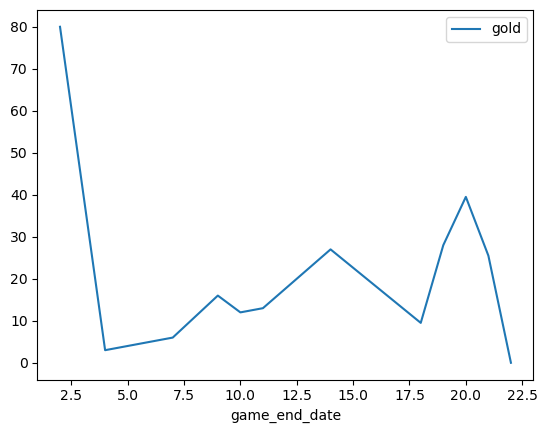

In [28]:
hourly_data = output_df.groupby(output_df.index.hour).mean()
hourly_data.plot()

## Step 2: Chart out the 'day of week' data of the chart representing host countries gold outcomes while in their country. 

<Axes: xlabel='day'>

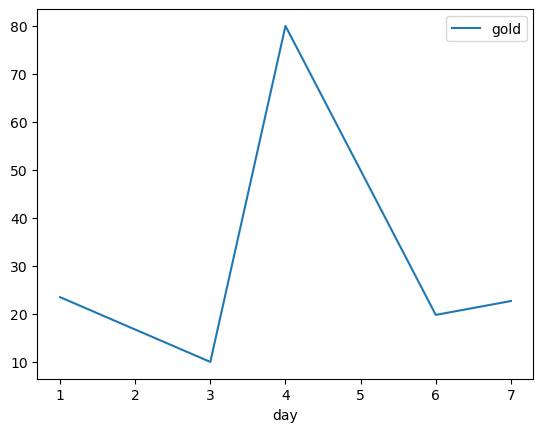

In [29]:
weekday_outcomes = output_df.groupby(output_df.index.isocalendar().day).mean()
weekday_outcomes.plot()

<Axes: xlabel='week'>

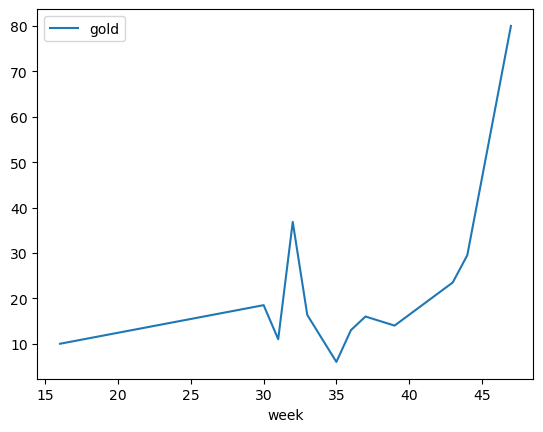

In [30]:
weekday_outcomes = output_df.groupby(output_df.index.isocalendar().week).mean()
weekday_outcomes.plot()

# How does population correlate with medal count?
## Read in World Population Data by 'country'

1. Rename world_population Country/Territory column to country
2. Merge olympic data and world population date on 'country' column



In [33]:
# Rename the Country/Territory column to country
world_population = world_population.rename(columns={'Country/Territory' : 'country'})
world_population.head()

,Rank,CCA3,country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [34]:
# Merge the world_population dataframe to the olympic_df, on 'country', inner join
olympic_df = pd.merge(olympic_df, world_population, on='country', how='inner')
olympic_df.columns

Index(['game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'year', 'edition', 'edition_id', 'country',
       'country_noc', 'gold', 'silver', 'bronze', 'total', 'Rank', 'CCA3',
       'Capital', 'Continent', '2022 Population', '2020 Population',
       '2015 Population', '2010 Population', '2000 Population',
       '1990 Population', '1980 Population', '1970 Population', 'Area (km²)',
       'Density (per km²)', 'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [65]:
# Pull relevant 2020 and 2022 population columns for analysis
population_df = olympic_df[['game_end_date', 'game_location', 'year', '2020 Population', '2022 Population','country', 'gold', 'silver', 'bronze', 'total' ]]
population_df.head()

,game_end_date,game_location,year,2020 Population,2022 Population,country,gold,silver,bronze,total
0,2021-08-08T14:00:00Z,Japan,2020,335942003,338289857,United States,39,41,33,113
1,2021-08-08T14:00:00Z,Japan,2020,125244761,123951692,Japan,27,14,17,58
2,2021-08-08T14:00:00Z,Japan,2020,25670051,26177413,Australia,17,7,22,46
3,2021-08-08T14:00:00Z,Japan,2020,17434557,17564014,Netherlands,10,12,14,36
4,2021-08-08T14:00:00Z,Japan,2020,64480053,64626628,France,10,12,11,33


In [83]:
# Calculate population number per medal count & add as a column pop_per_medal
population_df['pop_per_medal'] = round(population_df['2020 Population'] / population_df['total'], 2)
population_df.head()

/var/folders/j8/8fz1pphj3d18kslnjh7scn_00000gn/T/ipykernel_81159/4004966510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df['pop_per_medal'] = round(population_df['2020 Population'] / population_df['total'], 2)


,game_end_date,game_location,year,2020 Population,2022 Population,country,gold,silver,bronze,total,pop_per_medal
0,2021-08-08T14:00:00Z,Japan,2020,335942003,338289857,United States,39,41,33,113,2972938.08
1,2021-08-08T14:00:00Z,Japan,2020,125244761,123951692,Japan,27,14,17,58,2159392.43
2,2021-08-08T14:00:00Z,Japan,2020,25670051,26177413,Australia,17,7,22,46,558044.59
3,2021-08-08T14:00:00Z,Japan,2020,17434557,17564014,Netherlands,10,12,14,36,484293.25
4,2021-08-08T14:00:00Z,Japan,2020,64480053,64626628,France,10,12,11,33,1953941.00


<Axes: xlabel='ds'>

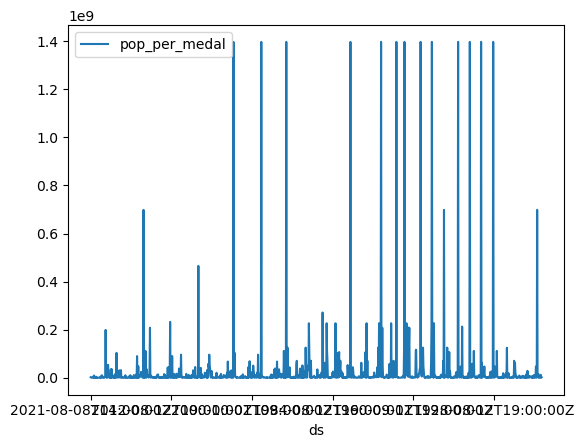

In [92]:
# Plot the population per total medals
predict_df = population_df[['game_end_date', 'pop_per_medal']]
predict_df = predict_df.rename(columns={'game_end_date' : 'ds'}).set_index('ds')
predict_df = pd.DataFrame(predict_df)
predict_df.plot()

In [81]:
countries = population_df['country']
population_2020 = population_df[['country', '2020 Population']]
total_medals = population_df['total']


In [ ]:
x1 = population_df['2020 Population']
y1 = population_df['total']
x2 = population_df['2020 Population']
y2 = population_df['gold']

plt.plot(x1, y1, label='Line 1')
plt.plot(x2, y2, label='Line 2')
plt.xlabel('2020 Population')
plt.ylabel('Medal Counts')
plt.title('Total Medal Counts')
plt.legend()
plt.show()

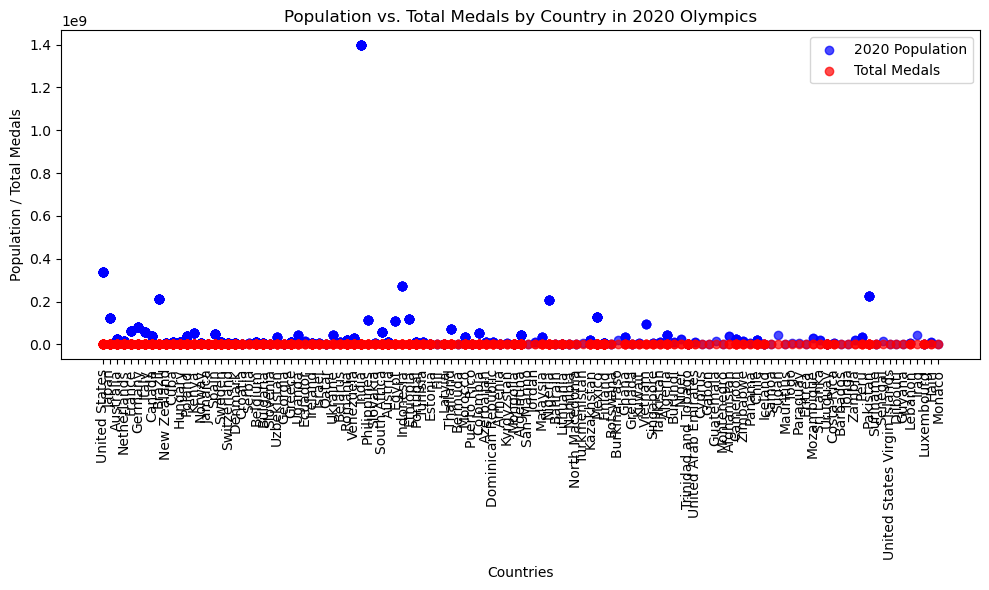

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(countries, population_2020, color='b', alpha=0.7, label='2020 Population')
plt.scatter(countries, total_medals, color='r', alpha=0.7, label='Total Medals')

plt.xlabel('Countries')
plt.ylabel('Population / Total Medals')
plt.title('Population vs. Total Medals by Country in 2020 Olympics')
plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Does the host city affect the number of medals won ? 

In this step our goal is to identify the differences between  a country's gold medal count when they host the olympics vs the median number of gold medals they have achieve historically. 

1. Slice data to show only relevant columns for Japan. 
2. Sort dataframe by year




In [62]:

# Grab relevant columns from olympic_df
host_city_df = olympic_df[['game_end_date', 'game_location', 'year', 'country', 'gold', 'silver', 'bronze', 'total' ]]

# Separate pull host city Japan Population and Medal Data
japan = host_city_df[host_city_df['country'] == 'Japan']

# Change game_end_date datatype to datetime
japan.loc[:, 'game_end_date'] = pd.to_datetime(japan['game_end_date'])

# Set game_end_date to datetime datatype
japan = japan.set_index('game_end_date')

japan

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,game_location,year,country,gold,silver,bronze,total
game_end_date,,,,,,,
2021-08-08 14:00:00+00:00,Japan,2020,Japan,27,14,17,58
2016-08-21 21:00:00+00:00,Brazil,2016,Japan,12,8,21,41
2012-08-12 19:00:00+00:00,Great Britain,2012,Japan,7,14,17,38
2008-08-24 12:00:00+00:00,China,2008,Japan,9,8,8,25
2004-08-29 18:00:00+00:00,Greece,2004,Japan,16,9,12,37
2000-10-01 09:00:00+00:00,Australia,2000,Japan,5,8,5,18
1996-08-05 21:00:00+00:00,United States,1996,Japan,3,6,5,14
1992-08-09 18:00:00+00:00,Spain,1992,Japan,3,8,11,22
1988-10-02 10:00:00+00:00,Republic of Korea,1988,Japan,4,3,7,14


In [ ]:
 japan.sort_index()